In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv(r"C:\Users\G4M3R\.cache\kagglehub\datasets\nikhil7280\student-performance-multiple-linear-regression\versions\1\Student_Performance.csv")

In [25]:
X = data.drop('Performance Index', axis=1)
y = data['Performance Index']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rozwiązanie korzystając z gotowych implementacji scikit

## zwykla regresja liniowa

In [33]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X_train['Extracurricular Activities'] = encoder.fit_transform(X_train['Extracurricular Activities'])
X_test['Extracurricular Activities'] = encoder.transform(X_test['Extracurricular Activities'])

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(y_test, predictions)
maep = mean_absolute_percentage_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(mae)
print(maep)
print(mse)

1.6111213463123044
0.034999265825985046
4.082628398521853


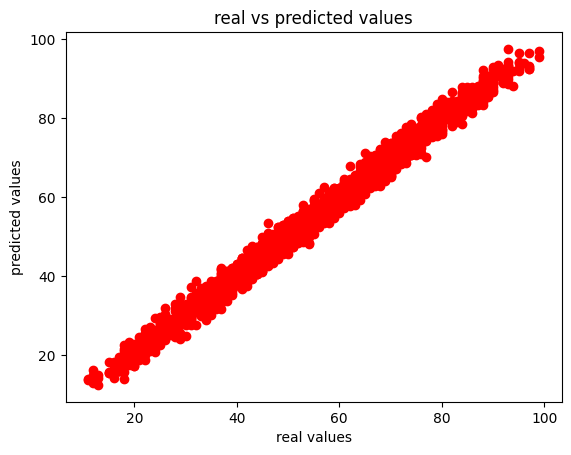

In [39]:
plt.scatter(y_test, predictions, c='red')
plt.xlabel('real values')
plt.ylabel('predicted values')
plt.title('real vs predicted values')
plt.show()

## Ridge regression

In [53]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.arange(11.0, 18.0, 0.1)}

ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print('best alpha value: ', grid_search.best_params_)
print('best score: ', grid_search.best_score_)

best alpha value:  {'alpha': 12.199999999999996}
best score:  0.9886614459593401


In [56]:
best_ridge = grid_search.best_estimator_

In [57]:
predictions_ridge = best_ridge.predict(X_test)
mae = mean_absolute_error(y_test, predictions_ridge)
maep = mean_absolute_percentage_error(y_test, predictions_ridge)
mse = mean_squared_error(y_test, predictions_ridge)
print(mae)
print(maep)
print(mse)

1.6111121072866372
0.035000680362147096
4.0827534451316945


## feature engineering

In [58]:
X_train.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
9254,5,49,0,7,5
1561,2,48,1,7,6
1670,2,81,0,7,2
6087,2,46,0,6,1
6669,8,47,0,9,0


In [63]:
X_train['StudyHours_Grades'] = X_train['Hours Studied'] * X_train['Previous Scores']
X_test['StudyHours_Grades'] = X_test['Hours Studied'] * X_test['Previous Scores']

In [65]:
lin_regr = LinearRegression()
lin_regr.fit(X_train, y_train)

prediction_eng = lin_regr.predict(X_test)

In [66]:
mae = mean_absolute_error(y_test, prediction_eng)
maep = mean_absolute_percentage_error(y_test, prediction_eng)
mse = mean_squared_error(y_test, prediction_eng)
print(mae)
print(maep)
print(mse)

1.6111776189098421
0.035002505505868114
4.0828384239366615
